# Mospy vs. PypeIt

In [47]:
# imports
import os
import numpy as np

from matplotlib import pyplot as plt

from astropy.io import fits

from pypeit.wavecalib import WaveCalib
from pypeit.spec2dobj import Spec2DObj
from pypeit.specobjs import SpecObjs

In [2]:
%matplotlib inline

# Setup

## Path to outputs

In [3]:
mospy_path = '/home/xavier/Projects/PypeIt-codes/Redux/Keck/MOSFIRE/Mospy'

In [4]:
pypeit_dir = 'keck_mosfire_A'
mospy_dir = 'Mospy_rdx'

## Slit 

In [5]:
maskdef_id = 9
objname = 'TARG20'
spat_id = 588

# Wavelengths

## PypeIt

### Load Masters file

In [6]:
mwave_file = os.path.join(mospy_path, pypeit_dir, 'Masters', 'MasterWaveCalib_A_1_DET01.fits')

In [7]:
mwave = WaveCalib.from_file(mwave_file)

[INFO]    :: datamodel.py 1539 from_file() - Loading WaveCalib from /home/xavier/Projects/PypeIt-codes/Redux/Keck/MOSFIRE/Mospy/keck_mosfire_A/Masters/MasterWaveCalib_A_1_DET01.fits


In [8]:
mwave

<WaveCalib:  items={'wv_fits': True, 'wv_fit2d': False, 'arc_spectra': True, 'nslits': True, 'spat_ids': True, 'PYP_SPEC': True, 'strpar': True, 'lamps': True}>

In [9]:
mwave.spat_ids

array([ 151,  410,  588,  721,  833,  965, 1121, 1321, 1630, 1874, 1987])

In [10]:
wv_idx = np.where(mwave.spat_ids == spat_id)[0][0]

### Inspect

#### RMS -- This is one of the highest, but not so bad

In [11]:
pypeit_rms = mwave.wv_fits[wv_idx].rms
pypeit_rms  # pixel

0.05842462773051389

#### Number of lines identified and not rejected

In [12]:
pypeit_nlin = np.sum(mwave.wv_fits[wv_idx].pypeitfit.gpm)
pypeit_nlin

65

## Mospy

### Open

In [13]:
mospy_wave_file = os.path.join(mospy_path, mospy_dir, 
                               'lambda_center_coeffs_wave_stack_H_m120910_0163-0176.npy')

In [14]:
mospy_wave_np = np.load(mospy_wave_file, allow_pickle=True)

In [15]:
mospy_wave_np[0].keys()

dict_keys(['linelist', 'MAD', 'foundlines', 'foundlinesig', 'sol_1d', 'STD', 'slitno', 'extract_pos'])

## Parse

In [16]:
mospy_wv_slitnos = [mospy_wave_np[idx]['slitno'] for idx in np.arange(mospy_wave_np.size)]
mospy_wv_sidx = mospy_wv_slitnos.index(maskdef_id)
mospy_wv_sidx

8

In [17]:
mospy_wave_mad = mospy_wave_np[mospy_wv_sidx]['MAD']
mospy_wave_std = mospy_wave_np[mospy_wv_sidx]['STD']
mospy_wave_mad, mospy_wave_std

(0.05670127378652978, 0.09697894717955621)

#### What units are those??

In [18]:
mospy_nlin = np.sum(np.isfinite(mospy_wave_np[mospy_wv_sidx]['foundlinesig']))
mospy_nlin

53

----

# Spec2D

## PypeIt

In [19]:
pypeit_spec2d_file = os.path.join(
    mospy_path, pypeit_dir,  'Science',  
    'spec2d_m120910_0163-MOSFIRE_DRP_MAS_MOSFIRE_20120910T123447.585.fits')

In [20]:
pypeit_spec2D = Spec2DObj.from_file(pypeit_spec2d_file, 'DET01')

In [21]:
pypeit_spec2D

<Spec2DObj:  items={'sciimg': True, 'ivarraw': True, 'skymodel': True, 'objmodel': True, 'ivarmodel': True, 'tilts': True, 'scaleimg': True, 'waveimg': True, 'bpmmask': True, 'imgbitm': True, 'slits': True, 'maskdef_designtab': True, 'sci_spat_flexure': False, 'sci_spec_flexure': True, 'vel_type': True, 'vel_corr': True, 'med_chis': True, 'std_chis': True, 'det': False, 'detector': True}>

### Grab the right slit

In [22]:
pypeit_spec2D_sidx = np.where(pypeit_spec2D.slits.spat_id == spat_id)[0][0]
pypeit_spec2D_sidx

2

### Diagnose

In [23]:
pypeit_spec2D_medchi = pypeit_spec2D.med_chis[pypeit_spec2D_sidx]
pypeit_spec2D_stdchi = pypeit_spec2D.std_chis[pypeit_spec2D_sidx]
pypeit_spec2D_medchi, pypeit_spec2D_stdchi

(0.0020785534, 1.0482076)

## Mospy

### Files

In [57]:
mospy_spec2d_eps_file = os.path.join(mospy_path, mospy_dir, 
                               'MOSFIRE_DRP_MASK_H_TARG20_eps.fits')

In [58]:
mospy_spec2d_eps_hdul = fits.open(mospy_spec2d_eps_file)
mospy_spec2d_eps_hdul.info()

Filename: /home/xavier/Projects/PypeIt-codes/Redux/Keck/MOSFIRE/Mospy/Mospy_rdx/MOSFIRE_DRP_MASK_H_TARG20_eps.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1062   (2287, 151)   float64   


In [59]:
mospy_spec2d_eps = mospy_spec2d_eps_hdul[0].data

In [60]:
# sig
mospy_spec2d_sig_file = os.path.join(mospy_path, mospy_dir, 
                               'MOSFIRE_DRP_MASK_H_TARG20_sig.fits')
mospy_spec2d_sig_hdul = fits.open(mospy_spec2d_sig_file)
mospy_spec2d_sig_hdul.info() 

Filename: /home/xavier/Projects/PypeIt-codes/Redux/Keck/MOSFIRE/Mospy/Mospy_rdx/MOSFIRE_DRP_MASK_H_TARG20_sig.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1062   (2287, 151)   float64   


In [28]:
mospy_spec2d_sig = mospy_spec2d_sig_hdul[0].data

### Avoid the pos/neg traces

In [61]:
mospy_spat_low = 0
mospy_spat_high = 60

In [62]:
mospy_spec2d_chis_img = mospy_spec2d_eps[mospy_spat_low:mospy_spat_high, :] / mospy_spec2d_sig[mospy_spat_low:mospy_spat_high, :]
# Deal with NaNs
good = np.isfinite(mospy_spec2d_chis_img)
mospy_spec2d_chis = mospy_spec2d_chis_img[good].flatten()

#### Plot

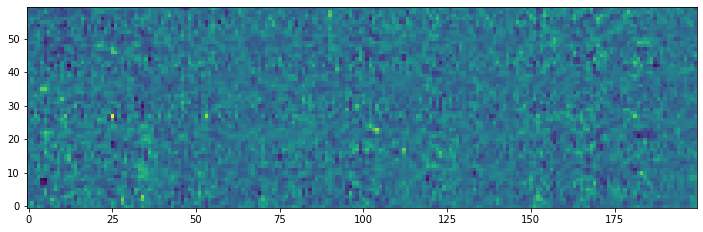

In [63]:
fig = plt.figure(figsize=(12,8))
plt.clf()
plt.imshow(mospy_spec2d_chis_img[:,1000:1200], origin='lower')
plt.show()

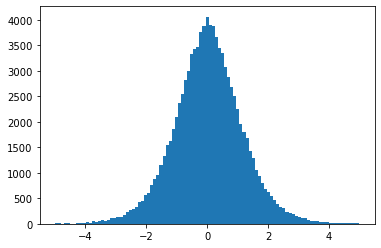

In [64]:
plt.clf()
ax = plt.gca()
ax.hist(mospy_spec2d_chis, bins=np.linspace(-5., 5.,100))
plt.show()

#### Stats

In [65]:
mospy_spec2D_medchi = np.median(mospy_spec2d_chis)
mospy_spec2D_stdchi = np.std(mospy_spec2d_chis)
mospy_spec2D_medchi, mospy_spec2D_stdchi

(0.03078560529793366, 1.14189537351403)

# Spec 1D

## PypeIt

### Load

In [66]:
pypeit_spec1d_file = os.path.join(
    mospy_path, pypeit_dir,  'Science',  
    'spec1d_m120910_0163-MOSFIRE_DRP_MAS_MOSFIRE_20120910T123447.585.fits')

In [67]:
pypeit_specobjs = SpecObjs.from_fitsfile(pypeit_spec1d_file)

### Grab the spectrum

In [68]:
pypeit_spec1d_sidx = np.where(pypeit_specobjs.SLITID == spat_id)[0][0]
pypeit_spec1d_sidx

2

In [69]:
pypeit_spec1d = pypeit_specobjs[pypeit_spec1d_sidx]
pypeit_spec1d

<SpecObj:  items={TRACE_SPAT: True
FWHM: True
FWHMFIT: True
THRESHOLD: True
smash_peakflux: True
OPT_WAVE: True
OPT_COUNTS: True
OPT_COUNTS_IVAR: True
OPT_COUNTS_SIG: True
OPT_MASK: True
OPT_COUNTS_SKY: True
OPT_FRAC_USE: True
OPT_CHI2: True
BOX_NPIX: True
BOX_WAVE: True
BOX_COUNTS: True
BOX_COUNTS_IVAR: True
BOX_COUNTS_SIG: True
BOX_MASK: True
BOX_COUNTS_SKY: True
BOX_RADIUS: True
FLEX_SHIFT_GLOBAL: True
FLEX_SHIFT_LOCAL: True
FLEX_SHIFT_TOTAL: True
VEL_TYPE: True
VEL_CORR: True
DET: DET01
DETECTOR: True
PYPELINE: True
OBJTYPE: True
SPAT_PIXPOS: 603.5635820627213
SPAT_FRACPOS: True
trace_spec: True
maskwidth: True
WAVE_RMS: True
SLITID: 588
OBJID: True
NAME: SPAT0604-SLIT0588-DET01
RA: 345.011
DEC: 33.01630555555555
MASKDEF_ID: 9
MASKDEF_OBJNAME: TARG20
hand_extract_flag: True
>

### S/N

In [72]:
pypeit_s2n_pix = pypeit_spec1d.OPT_COUNTS / pypeit_spec1d.OPT_COUNTS_SIG
np.median(pypeit_s2n_pix)

12.159540625555106

In [76]:
pypeit_dwv = np.abs(pypeit_spec1d.OPT_WAVE - np.roll(pypeit_spec1d.OPT_WAVE,1))
pypeit_dwv[0] = pypeit_dwv[1]

In [77]:
pypeit_s2n_ang = pypeit_s2n_pix / pypeit_dwv

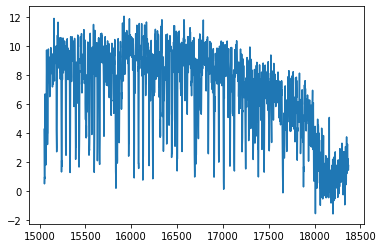

In [78]:
plt.clf()
ax = plt.gca()
ax.plot(pypeit_spec1d.OPT_WAVE, pypeit_s2n_ang)
plt.show()

## Mospy

### Load

In [106]:
mospy_nexp = 176-163 + 1 # Number of exposures
mospy_nexp

14

In [87]:
mospy_spec1d_file = os.path.join(mospy_path, mospy_dir, 
                               'MOSFIRE_DRP_MASK_H_TARG20_1D_00.fits')

In [94]:
mospy_spec1d_hdul = fits.open(mospy_spec1d_file)
mospy_head0 = mospy_spec1d_hdul[0].header
mospy_spec1d_hdul.info()

Filename: /home/xavier/Projects/PypeIt-codes/Redux/Keck/MOSFIRE/Mospy/Mospy_rdx/MOSFIRE_DRP_MASK_H_TARG20_1D_00.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1060   (2287,)   float64   
  1                1 ImageHDU      1062   (2287,)   float64   


In [101]:
mospy_spec1d_eps = mospy_spec1d_hdul[0].data
mospy_spec1d_sig = mospy_spec1d_hdul[1].data
mospy_spec1d_wave = mospy_head0['CRVAL1'] + np.arange(mospy_spec1d_eps.size)*mospy_head0['CD1_1']

### S/N

In [114]:
mospy_s2n_pix = mospy_spec1d_eps / mospy_spec1d_sig
mospy_s2n_ang = mospy_s2n_pix / mospy_head0['CD1_1']

### Plot

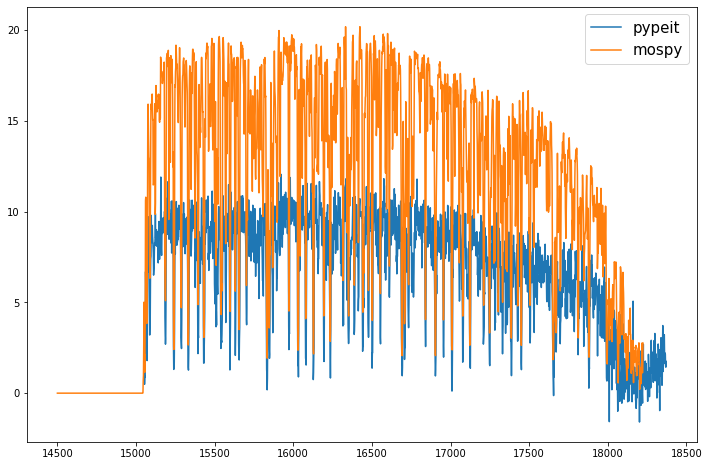

In [122]:
fig = plt.figure(figsize=(12,8))
plt.clf()
ax = plt.gca()
ax.plot(pypeit_spec1d.OPT_WAVE, pypeit_s2n_ang, label='pypeit')
#ax.plot(mospy_spec1d_wave, mospy_s2n_ang/np.sqrt(mospy_nexp), label='mospy')
ax.plot(mospy_spec1d_wave, mospy_s2n_ang, label='mospy')
#
ax.legend(fontsize=15.)
#
plt.show()

### Plot the e/s

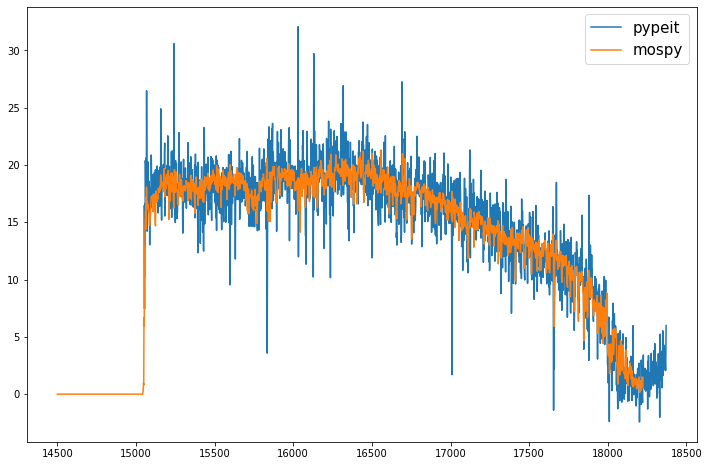

In [120]:
fig = plt.figure(figsize=(12,8))
plt.clf()
ax = plt.gca()
ax.plot(pypeit_spec1d.OPT_WAVE, pypeit_spec1d.OPT_COUNTS/30., label='pypeit')
ax.plot(mospy_spec1d_wave, mospy_spec1d_eps, label='mospy')
#
ax.legend(fontsize=15.)
#
plt.show()

### Plot sig

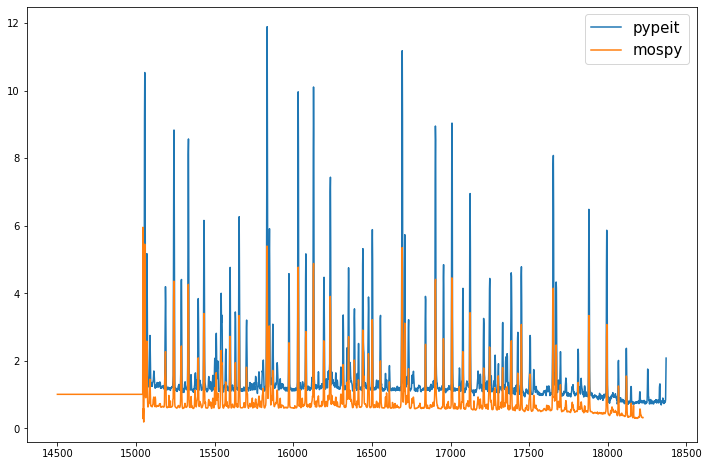

In [121]:
fig = plt.figure(figsize=(12,8))
plt.clf()
ax = plt.gca()
ax.plot(pypeit_spec1d.OPT_WAVE, pypeit_spec1d.OPT_COUNTS_SIG/30., label='pypeit')
ax.plot(mospy_spec1d_wave, mospy_spec1d_sig, label='mospy')
#
ax.legend(fontsize=15.)
#
plt.show()

----